<table class="table table-bordered">
    <tr>
        <th style="width:200px;">
            <img src='https://bcgriseacademy.com/hs-fs/hubfs/RISE%202.0%20Logo_Options_25Jan23_RISE%20-%20For%20Black%20Background.png?width=3522&height=1986&name=RISE%202.0%20Logo_Options_25Jan23_RISE%20-%20For%20Black%20Background.png' style="background-color:black; width: 100%; height: 100%;">
        </th>
        <th style="text-align:center;">
            <h1>IBF TFIP</h1>
            <h2>Classification using Scikitlearn</h2>
        </th>
    </tr>
</table>

### Please use the User_data.csv" dataset to create a Logistic Regression model by executing the intermediate steps as mentioned below
**User Database**: This dataset comprises data from a company's database on users. It includes UserID, Gender, Age, EstimatedSalary, and Purchased data. With the use of this dataset, we can forecast if a customer would buy the recently announced product of the business.

1. Import packages, functions, and classes
2. Get data to work with and, if appropriate, transform it
3. Create a classification model and train (or fit) it with your existing data
4. Calculate Confusion Matrix and Accuracy Score used to evaluate the model performance 
5. Create Visualisation for the Confusion matrix with a subplot
6. Visualise the performance of the model with a listed colormap

In [15]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
#Read and Explore the data
dataset = pd.read_csv("Datasets/User_Data.csv")


Now, to predict whether a user will purchase the product or not, we need to find out the relationship between Age and Estimated Salary. 
Here User ID and Gender are not important factors for finding out this

In [17]:
dataset.head(2)

,User ID,Gender,Age,Estimated Salary,Purchased
0,1099,Male,48,1200000,1
1,2091,Male,30,60410,0


In [18]:
mapping_gender = {'Male':0, 'Female':1}

In [19]:
dataset.Gender.map(mapping_gender)

0     0
1     0
2     0
3     0
4     1
5     1
6     1
7     1
8     0
9     0
10    0
11    0
12    1
13    1
14    1
15    1
16    0
17    0
18    0
19    0
20    1
21    1
22    1
23    1
24    0
25    0
26    0
27    0
28    1
29    1
30    1
31    1
32    0
Name: Gender, dtype: int64

In [21]:
(dataset.Gender == "Male").astype(int)

0     1
1     1
2     1
3     1
4     0
5     0
6     0
7     0
8     1
9     1
10    1
11    1
12    0
13    0
14    0
15    0
16    1
17    1
18    1
19    1
20    0
21    0
22    0
23    0
24    1
25    1
26    1
27    1
28    0
29    0
30    0
31    0
32    1
Name: Gender, dtype: int64

In [22]:

# input
x = dataset.iloc[:, [2, 3]].values

# output
y = dataset.iloc[:, 4].values


### Splitting The Dataset: Train and Test dataset
75% of data is used for training the model and 25% of it is used to test the performance of our model. 

In [23]:

from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(
	x, y, test_size=0.25, random_state=0)


Now, it is very important to perform feature scaling here because Age and Estimated Salary values lie in different ranges. If we don’t scale the features then the Estimated Salary feature will dominate the Age feature when the model finds the nearest neighbor to a data point in the data space. 

In [24]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()

xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)

In [25]:
print (xtrain[0:10, :])

[[-0.0768322   2.20752572]
 [-0.81442137  0.4821147 ]
 [ 0.66075696 -0.55319595]
 [-0.72222273  1.17415824]
 [-0.81442137 -0.00494765]
 [ 0.66075696 -0.59057782]
 [-1.36761325 -0.57913765]
 [-0.44562679  0.50345323]
 [ 1.12175019 -0.57837942]
 [ 0.66075696 -0.58866104]]


Here we observe that Age and Estimated salary features values are scaled and now there in the range -1 to 1. Hence, each feature will contribute equally to decision making i.e. finalizing the hypothesis. 
Finally, we are training our Logistic Regression model. 

#### Train the Model

In [26]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(xtrain, ytrain)


LogisticRegression(random_state=0)

After training the model, it is time to use it to do predictions on testing data. 

In [27]:
y_pred = classifier.predict(xtest)

Let’s test the performance of our model by Confusion Matrix 

In [28]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(ytest, y_pred)
print ("Confusion Matrix : \n", cm)


Confusion Matrix : 
 [[1 1]
 [1 6]]


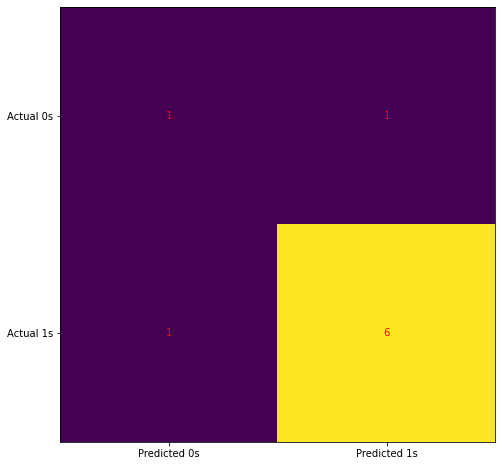

In [29]:

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

The obtained matrix shows the following:

1. One true negative prediction

2. One false negative prediction

3. One false positive prediction

4. Six true positive predictions

Now Let us evaluate the accuracy of the model

In [10]:
from sklearn.metrics import accuracy_score

print ("Accuracy : ", accuracy_score(ytest, y_pred))



Accuracy :  0.7777777777777778


Visualising the Logistic Regression Model 

In [30]:
X_set

array([[-1.09101731, -0.58581949],
       [ 0.9373529 , -0.58355979],
       [ 0.29196238,  2.79866728],
       [-0.90662002, -0.54510471],
       [-0.44562679, -0.02966202],
       [ 0.38416102,  1.06692353],
       [ 1.39834613, -0.55483395],
       [ 0.38416102,  2.20675456],
       [ 0.19976373,  0.55310798]])

In [32]:
#np.arange(start = X_set[:, 0].min() - 1,stop = X_set[:, 0].max() + 1, step = 0.01)

In [35]:
#np.arange(start = X_set[:, 1].min() - 1,stop = X_set[:, 1].max() + 1, step = 0.01)

<ipython-input-36-ae64191e2c0d>:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


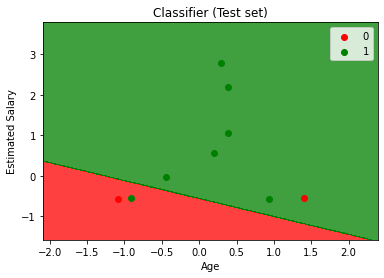

In [36]:
from matplotlib.colors import ListedColormap

X_set, y_set = xtest, ytest


X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,stop = X_set[:, 0].max() + 1, step = 0.01),np.arange(start = X_set[:, 1].min() - 1,stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(
			np.array([X1.ravel(), X2.ravel()]).T).reshape(
			X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
	plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
				c = ListedColormap(('red', 'green'))(i), label = j)
	
plt.title('Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

Analyzing the performance measures – accuracy and confusion matrix and the graph, we can come to a conclusion thats this model performance is moderate.

**************************   This is the end of our session ******************************

Copyright © 2023 by Boston Consulting Group. All rights reserved.